In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

/Users/costefan/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/__init__.py:997: UserWarning: Bad val "TkAggX" on line #1
	"backend: TkAggX
"
	in file "/Users/costefan/.matplotlib/matplotlibrc"
	Key backend: Unrecognized backend string "tkaggx": valid strings are ['GTK', 'GTKAgg', 'GTKCairo', 'MacOSX', 'Qt4Agg', 'Qt5Agg', 'TkAgg', 'WX', 'WXAgg', 'GTK3Cairo', 'GTK3Agg', 'WebAgg', 'nbAgg', 'agg', 'cairo', 'gdk', 'pdf', 'pgf', 'ps', 'svg', 'template']
  (val, error_details, msg))


In [2]:
%matplotlib inline

# 1)

## a.

Lasso is regression with adding regilarizator L1 to linear model, to avoid overfitting of model. <br/>
We want to minimize residuals, and coefficients in linear regression(big coeffs - is the signal, that model is overfitted) <br/> 
So we add to the model norm of vector of coeffs with some multiplier Lambda. <br />
Also Lasso regression, unlike Ridge, is not smooth, and can assign coeffs to nulls (select subset).

## b.

Cause by doing Regularization we are trying to fix scales of coeffs, and if our $x$`s is not standartized, it has influence in all model. cause if we'll have different dimensions of x, we would not conclude anything, cause mathematically coefficients of x would not mean anything without scaling x.

## c.

In [3]:
df = pd.read_excel('ceo.xls')

In [4]:
cols = ['salary', 'totcomp', 'tenure', 'age', 'sales', 'profits', 'assets']

In [5]:
df = df[cols]

In [6]:
X, y = df.drop('salary', axis=1).as_matrix(), df['salary'].as_matrix()

In [7]:
df.head()

,salary,totcomp,tenure,age,sales,profits,assets
0,3030,8138,7,61,161315.0,2956.0,257389.0
1,6050,14530,0,51,144416.0,22071.0,237545.0
2,3571,7433,11,63,139208.0,4430.0,49271.0
3,3300,13464,6,60,100697.0,6370.0,92630.0
4,10000,68285,18,63,100469.0,9296.0,355935.0


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
from sklearn.linear_model import Lasso

In [10]:
from sklearn.pipeline import Pipeline

## Split data on train/test

In [11]:
from sklearn.cross_validation import train_test_split

/Users/costefan/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
X_train

array([[  7.46700000e+03,   2.00000000e+00,   6.00000000e+01,
          7.35100000e+03,   1.94300000e+03,   4.18510000e+04],
       [  7.77000000e+02,   2.00000000e+00,   5.10000000e+01,
          3.24290000e+03,   2.27900000e+02,   2.74810000e+03],
       [  7.54100000e+03,   3.00000000e+00,   5.70000000e+01,
          1.20480000e+04,  -7.30000000e+01,   1.33115000e+05],
       ..., 
       [  1.08700000e+03,   1.00000000e+00,   6.20000000e+01,
          3.83610000e+03,   5.13000000e+01,   6.90000000e+03],
       [  9.08000000e+02,   2.00000000e+00,   5.20000000e+01,
          8.57540000e+03,   5.05000000e+01,   1.55230000e+03],
       [  3.65490000e+04,   1.30000000e+01,   5.50000000e+01,
          4.55990000e+03,  -7.54800000e+02,   3.85250000e+03]])

In [14]:
scaler = StandardScaler()

In [15]:
sc = scaler.fit(X_train)

In [16]:
X_train_scaled = sc.transform(X_train)

In [17]:
X_train_scaled

array([[-0.04010727, -0.66752252,  0.5247998 , -0.22853294,  1.2742613 ,
         0.26490728],
       [-0.22215161, -0.66752252, -0.76222015, -0.49595033, -0.35730257,
        -0.36807312],
       [-0.03809362, -0.55005663,  0.09579315,  0.07721898, -0.64354685,
         1.74224842],
       ..., 
       [-0.21371607, -0.78498841,  0.81080423, -0.45733589, -0.52530104,
        -0.300864  ],
       [-0.21858692, -0.66752252, -0.61921793, -0.14883044, -0.52606208,
        -0.3874302 ],
       [ 0.75125501,  0.62460229, -0.19021128, -0.41022002, -1.29213891,
        -0.35019558]])

## Scatter plots

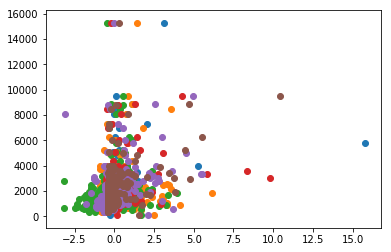

In [18]:
colors = "bgrcmykw"

for index in range(len(cols) - 1):
    plt.scatter(list(map(lambda x: x[index], X_train_scaled)), y_train)

In [19]:
from sklearn.linear_model import LassoCV

In [20]:
lasso_regression = Lasso()

In [21]:
lasso_params = {
    'alpha': np.arange(0.1, 1, 0.02)
}

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
lasso_grid = GridSearchCV(
    lasso_regression,
    lasso_params,
    cv=5,
    n_jobs=-1
)

In [24]:
lasso_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': array([ 0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,  0.26,
        0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,  0.44,
        0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,  0.62,
        0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,  0.8 ,
        0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,  0.98])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [25]:
lasso_grid.best_params_

{'alpha': 0.98000000000000009}

In [26]:
lasso_grid.best_score_

-0.56856649109110158

In [27]:
lasso_grid.cv_results_


{'mean_fit_time': array([ 0.00348911,  0.00060015,  0.00031362,  0.00043159,  0.00049205,
         0.000491  ,  0.00047636,  0.00047331,  0.00047221,  0.00047121,
         0.00051818,  0.00046926,  0.00046859,  0.00044241,  0.00054483,
         0.00054164,  0.00049648,  0.00040727,  0.00044413,  0.00049481,
         0.00046158,  0.00048661,  0.00049105,  0.00050783,  0.00047288,
         0.00047441,  0.00040932,  0.0004108 ,  0.00046968,  0.00044246,
         0.00046935,  0.00048895,  0.00040498,  0.00030665,  0.00035486,
         0.00033336,  0.00034275,  0.00031357,  0.00033607,  0.00041323,
         0.00043607,  0.00032883,  0.00029449,  0.00029316,  0.00029278]),
 'mean_score_time': array([ 0.00244913,  0.0002737 ,  0.00018077,  0.00025802,  0.00029054,
         0.00029583,  0.00026922,  0.00028367,  0.00027542,  0.00027633,
         0.0002852 ,  0.0002821 ,  0.00094991,  0.00026541,  0.00021024,
         0.00030065,  0.00028744,  0.00022125,  0.00026379,  0.00027809,
         0.00

In [28]:
from sklearn import metrics

In [29]:
X_test_scaled = sc.transform(X_test)

In [30]:
y_predict = lasso_grid.best_estimator_.predict(X_test_scaled)

In [31]:
lasso_grid.grid_scores_

/Users/costefan/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -0.57349, std: 1.75830, params: {'alpha': 0.10000000000000001},
 mean: -0.57338, std: 1.75809, params: {'alpha': 0.12000000000000001},
 mean: -0.57326, std: 1.75789, params: {'alpha': 0.14000000000000001},
 mean: -0.57315, std: 1.75769, params: {'alpha': 0.16000000000000003},
 mean: -0.57304, std: 1.75748, params: {'alpha': 0.18000000000000002},
 mean: -0.57293, std: 1.75728, params: {'alpha': 0.20000000000000001},
 mean: -0.57281, std: 1.75708, params: {'alpha': 0.22000000000000003},
 mean: -0.57270, std: 1.75687, params: {'alpha': 0.24000000000000002},
 mean: -0.57259, std: 1.75668, params: {'alpha': 0.26000000000000001},
 mean: -0.57248, std: 1.75648, params: {'alpha': 0.28000000000000003},
 mean: -0.57237, std: 1.75627, params: {'alpha': 0.30000000000000004},
 mean: -0.57226, std: 1.75607, params: {'alpha': 0.32000000000000006},
 mean: -0.57215, std: 1.75587, params: {'alpha': 0.34000000000000008},
 mean: -0.57203, std: 1.75566, params: {'alpha': 0.3600000000000001},
 mean: 

In [32]:
alpha_per_mean_score = {item[0]['alpha']: item[1] for item in lasso_grid.grid_scores_ }
alpha_per_mean_score

/Users/costefan/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


{0.10000000000000001: -0.57348890909437455,
 0.12000000000000001: -0.57337633815847533,
 0.14000000000000001: -0.57326389116720633,
 0.16000000000000003: -0.57315159522220704,
 0.18000000000000002: -0.57303930758910748,
 0.20000000000000001: -0.5729270282679092,
 0.22000000000000003: -0.57281475725861031,
 0.24000000000000002: -0.57270249456121114,
 0.26000000000000001: -0.57259475681448202,
 0.28000000000000003: -0.57248251048452992,
 0.30000000000000004: -0.572370186403234,
 0.32000000000000006: -0.57225795657233069,
 0.34000000000000008: -0.5721457350533391,
 0.3600000000000001: -0.57203352184626088,
 0.38: -0.57192131695109172,
 0.40000000000000002: -0.57180912036783604,
 0.42000000000000004: -0.57169610787578651,
 0.44000000000000006: -0.57158392796060475,
 0.46000000000000008: -0.57147175635733471,
 0.48000000000000009: -0.5713595930659755,
 0.50000000000000011: -0.57124743808652911,
 0.52000000000000013: -0.57113529141899355,
 0.54000000000000004: -0.57102315306337004,
 0.560000

In [33]:
# New object 
lasso_grid.cv_results_

{'mean_fit_time': array([ 0.00348911,  0.00060015,  0.00031362,  0.00043159,  0.00049205,
         0.000491  ,  0.00047636,  0.00047331,  0.00047221,  0.00047121,
         0.00051818,  0.00046926,  0.00046859,  0.00044241,  0.00054483,
         0.00054164,  0.00049648,  0.00040727,  0.00044413,  0.00049481,
         0.00046158,  0.00048661,  0.00049105,  0.00050783,  0.00047288,
         0.00047441,  0.00040932,  0.0004108 ,  0.00046968,  0.00044246,
         0.00046935,  0.00048895,  0.00040498,  0.00030665,  0.00035486,
         0.00033336,  0.00034275,  0.00031357,  0.00033607,  0.00041323,
         0.00043607,  0.00032883,  0.00029449,  0.00029316,  0.00029278]),
 'mean_score_time': array([ 0.00244913,  0.0002737 ,  0.00018077,  0.00025802,  0.00029054,
         0.00029583,  0.00026922,  0.00028367,  0.00027542,  0.00027633,
         0.0002852 ,  0.0002821 ,  0.00094991,  0.00026541,  0.00021024,
         0.00030065,  0.00028744,  0.00022125,  0.00026379,  0.00027809,
         0.00

# TODO:  PLOT estimated parameters

#### I would recommend $alpha = 0.95$

## 2)

In [34]:
df_sales_profits = df[['sales', 'profits']]
df_sales_profits.head()

,sales,profits
0,161315.0,2956.0
1,144416.0,22071.0
2,139208.0,4430.0
3,100697.0,6370.0
4,100469.0,9296.0


In [35]:
log_df_sales_profits = df_sales_profits.apply(np.log)
log_df_sales_profits = log_df_sales_profits[~pd.isnull(log_df_sales_profits)]
log_df_sales_profits = log_df_sales_profits[
    (log_df_sales_profits['sales'] > 0) & 
    (log_df_sales_profits['profits'] > 0)
]

Text(0,0.5,'Profits')

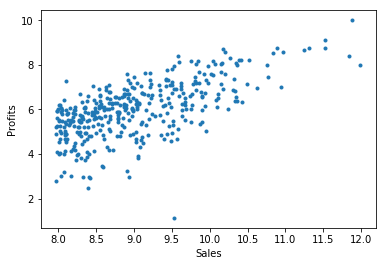

In [36]:
plt.plot(log_df_sales_profits['sales'], log_df_sales_profits['profits'], '.')
plt.xlabel('Sales')
plt.ylabel('Profits')

### a.

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
linear_regression = LinearRegression()

In [39]:
X = log_df_sales_profits['sales'].as_matrix().reshape(-1, 1)
y = log_df_sales_profits['profits']

In [40]:
regressor = linear_regression.fit(X, y)

In [41]:
regressor.coef_

array([ 1.01099621])

<b>PLOT 

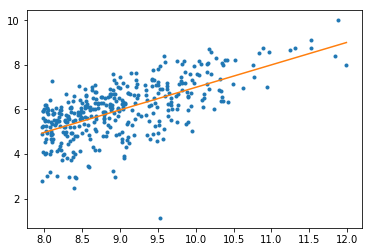

In [42]:
plt.plot(
    X, y, '.',
    X, regressor.predict(X), '-'
)

### b.

In [43]:
from scipy.optimize import curve_fit

In [44]:
from scipy import log as log
def func(x, a, b, c):
    return a * np.log(b * x) + c

In [45]:
popt, pcov = curve_fit(func, X.ravel(), y.ravel())

/Users/costefan/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


In [46]:
popt

array([ 9.36610037,  0.33681642, -4.37448585])

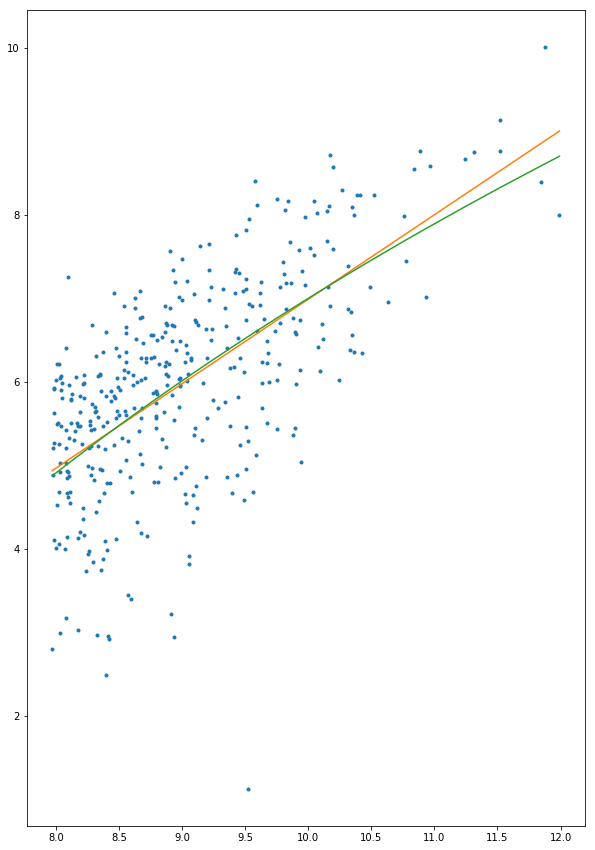

In [47]:
plt.figure(figsize=(10, 15))
plt.plot(
    X, y, '.',
    X, regressor.predict(X), '-',
    X, func(X, *popt)
)


## c.

Linear approximation has shifted statistics and we should carefuly interpret non linear statistics.

## 3)

## a.

If bandwidth too small, our model will overfit, our Kernel function will be decreasing slowly, and model will overfit, cause we will assign smaller (than it would be to bigger bandwidth) weights to objects that has bigger distance, and bigger (than it would be to bigger bandwidth) to closer.

If bandwidth too big, we will not get needed approximation in our line, cause Kernel function will be decreasing faster, so we will asign weights smaller (than it would be to smaller bandwidth) and closer objects would be not so valuable for the model. 

## b.

In [48]:
from statsmodels.nonparametric.kernel_regression import KernelReg

In [49]:
# Cross validation runs by default
model = KernelReg(
    endog=y, exog=X, var_type='c', reg_type='lc'
)

In [50]:
print(model._bw_method)
print(model.bw_func)

cv_ls
{'cv_ls': <bound method KernelReg.cv_loo of KernelReg instance
Number of variables: k_vars = 1
Number of samples:   N = 388
Variable types:      c
BW selection method: cv_ls
Estimator type: lc
>, 'aic': <bound method KernelReg.aic_hurvich of KernelReg instance
Number of variables: k_vars = 1
Number of samples:   N = 388
Variable types:      c
BW selection method: cv_ls
Estimator type: lc
>}


In [51]:
model.bw

array([ 0.23747466])

In [52]:
means, mfx = model.fit()

### Optimal bandwidth is calculated by least-squares cross-validation

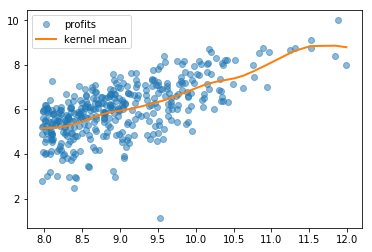

In [53]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(X, y, 'o', alpha=0.5)
ax.plot(X, means, lw=2, label='kernel mean')
ax.legend()

plt.show()

## c.

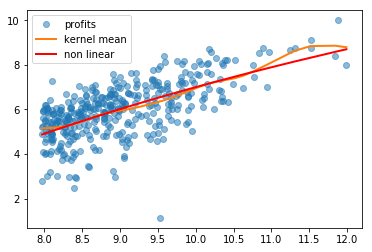

In [54]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(X, y, 'o', alpha=0.5)
ax.plot(X, means, lw=2, label='kernel mean')
ax.plot(X, func(X, *popt), '-r', lw=2, label='non linear')
ax.legend()

plt.show()

## 4.

### a.

### Salary binarization

In [55]:
y_binary = df['salary'].apply(lambda x: 1 if x >= 2000 else 0)

In [56]:
from pprint import pprint
%pprint on

pprint(list(zip(y_binary, df['salary']))[0:20])

Pretty printing has been turned OFF
[(1, 3030),
 (1, 6050),
 (1, 3571),
 (1, 3300),
 (1, 10000),
 (1, 9375),
 (1, 9525),
 (1, 5000),
 (0, 999),
 (1, 3300),
 (1, 3500),
 (1, 2493),
 (0, 1911),
 (1, 2130),
 (0, 1185),
 (1, 5236),
 (0, 1990),
 (1, 6000),
 (1, 6229),
 (0, 1523)]


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

### Logistic regression

In [58]:
logistic_regr = LogisticRegression()

In [59]:
X = df[['totcomp', 'tenure', 'age', 'sales', 'profits', 'assets']]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary)

In [61]:
logistic_regr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
y_pred = logistic_regr.predict(X_test)

In [63]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [64]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.91      0.84        81
          1       0.59      0.32      0.42        31

avg / total       0.73      0.75      0.72       112



### Features selection

In [65]:
rfe = RFE(estimator=logistic_regr)

In [66]:
fit = rfe.fit(X_train, y_train)

In [67]:
print("Num Features: {}".format(fit.n_features_))
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

Num Features: 3
Selected Features: [False  True  True False  True False]
Feature Ranking: [2 1 1 3 1 4]


In [68]:
y_pred = fit.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.75      0.96      0.84        81
          1       0.62      0.16      0.26        31

avg / total       0.72      0.74      0.68       112



### b.

## Add !!!!!!

### c.

In [70]:
import random
N_CEOS = 5


df_cols_numbers = random.sample(range(0, X.shape[0]), N_CEOS)

In [71]:
df_cols_numbers

[210, 378, 407, 111, 432]

In [72]:
df_selected_five = X.iloc[df_cols_numbers]

In [73]:
a = rfe.predict_proba(df_selected_five)
a

array([[ 0.46592209,  0.53407791],
       [ 0.72209872,  0.27790128],
       [ 0.78305288,  0.21694712],
       [ 0.56485787,  0.43514213],
       [ 0.7822848 ,  0.2177152 ]])

In [74]:
coefs = rfe.estimator_.coef_
intercept = rfe.estimator_.intercept_

### Probabilities

In [75]:
a[:, :1].ravel()

array([ 0.46592209,  0.72209872,  0.78305288,  0.56485787,  0.7822848 ])

Probability will be calculated by having multiplied $<w, x>$ (including intercept) and getted sigmoid function from it. <br/> So: we have coefs, intercept, X, and sigmoid function, we can calculate.

Having probabilities we can assign the threshold, and having it assing label <br/ >
There is some ways to choose threshold, one of them assign it to 0.5 another is to choose it by having banance between precision recall of classificator.

### d.

In [76]:
y_test.shape

(112,)

In [77]:
y_pred.shape

(112,)

In [78]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.75      0.96      0.84        81
          1       0.62      0.16      0.26        31

avg / total       0.72      0.74      0.68       112



In [79]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score 

In [80]:
tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
print(recall_score(y_test, y_pred, pos_label=1))
print(precision_score(y_test, y_pred, pos_label=1))

0.161290322581
0.625


In [81]:
print(tp)
print(fp)
print(fn)
print(tn)
# We should transform this matrix, cause order is wrong (for label 0)

78
3
26
5


### Interpretation

True positive - is how much of objects with label 1 was interpreted as 1 <br/>
False positive - is how much of objects with label -1 was interpreted as 1 <br/ >
False negative - is how much of objects with label 1 was interpreted as -1 <br/ >
True negative - is how much of objects with label -1 was interpreted as -1 <br/ >

Metrics - <br/>
precision - is how much of object that was labeled as 1 has label 1 for real <br/>
recall - is how much of real object with label 1 was found <br/>
sensivity = recall <br/>
specifity  = recall for another <br />

Sensivity = recall = 14/35 = 0.4 <br/>

Specifity = recall for label 0 = 69/77= 0.89

## e.

In [82]:
from sklearn import metrics

In [83]:
y_pred_proba = fit.predict_proba(X_test)
y_pred_proba = y_pred_proba[:,1]

In [84]:
fpr, tpr, tresholds = metrics.roc_curve(y_test, y_pred_proba)

Text(0,0.5,'True positive')

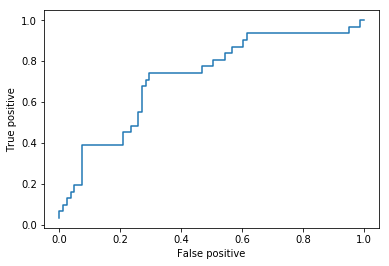

In [85]:
plt.plot(fpr, tpr, label='Model')
plt.xlabel('False positive')
plt.ylabel('True positive')


In [86]:
tresholds

array([ 0.99980404,  0.99364746,  0.97898653,  0.9186956 ,  0.68524087,
        0.63971554,  0.52036033,  0.51434484,  0.48792218,  0.48322219,
        0.47016465,  0.38540021,  0.31985734,  0.31778531,  0.31184386,
        0.30923981,  0.30741997,  0.30113048,  0.29962509,  0.29501763,
        0.29076671,  0.28715484,  0.28186796,  0.28049208,  0.2478082 ,
        0.24776142,  0.24293916,  0.24228647,  0.23797283,  0.23682746,
        0.23598173,  0.2328669 ,  0.22836161,  0.22335524,  0.22225485,
        0.22185148,  0.15518206,  0.15246881,  0.11277753,  0.09919343,
        0.09522345])

Optimal treshold - it depends on what we want to optimize

In [87]:
opt_treshold = 0.44

## f.

In [88]:
y_pred_adj = [1 if y > opt_treshold else 0 for y in y_pred_proba]

In [89]:
print(classification_report(y_pred, y_pred_adj))

             precision    recall  f1-score   support

          0       1.00      0.93      0.97       104
          1       0.53      1.00      0.70         8

avg / total       0.97      0.94      0.95       112



More strict.

## 5.

### a.

In [90]:
from sklearn.tree import DecisionTreeRegressor

If the first variable for splitting is assets, we should at first find value of $t$, which can divide our set of objects, so we are minimizing $$ Q = \dfrac{|X_{left}|}{|X_m|} * H(X_{left}) + \dfrac{|X_{right}|}{|X_m|} * H(X_{right}) $$, where $H(X)$ is information criteria, which is the varience of labels, calculated as MSE.

### b.

In [91]:
tree_regr = DecisionTreeRegressor(max_depth=10)

In [92]:
X, y = df.drop('salary', axis=1).as_matrix(), df['salary'].as_matrix()

In [93]:
tree_regr.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [95]:
import graphviz 
from sklearn import tree

In [96]:
dot_data = tree.export_graphviz(tree_regr, out_file=None) 

In [103]:
graph = graphviz.Source(dot_data)

In [105]:
graph.render(view=True)

'data.pdf.pdf'